In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
dirsyes = [
    './电动车充电识别-数据/train/电动车48V2.8A',
    './电动车充电识别-数据/train/电动车(工况：未知),1500W电暖器(工况：未知)',
    
]
dirsno = [

    './电动车充电识别-数据/train/220V1150W微波炉',
    './电动车充电识别-数据/train/220V1500W电暖器',
    './电动车充电识别-数据/train/220V1800W烧水壶',
    './电动车充电识别-数据/train/220V1A苹果笔记本',
    './电动车充电识别-数据/train/220V3.5A华硕天选4',
    './电动车充电识别-数据/train/220V800W饮水机',
    './电动车充电识别-数据/train/220V碎纸机',
    './电动车充电识别-数据/train/手机',
    './电动车充电识别-数据/train/手机/华为P30PRO手机',
    './电动车充电识别-数据/train/手机(工况：80%以下充电),带独显笔记本电脑(工况：未知)',
    './电动车充电识别-数据/train/电脑',
    './电动车充电识别-数据/train/电脑/thinkpadX1nano充电（笔记本电脑）',
    './电动车充电识别-数据/train/电脑(工况：未知),1500W电暖器(工况：未知)',
    './电动车充电识别-数据/train/电脑(工况：未知),碎纸机(工况：未知)',
    './电动车充电识别-数据/train/电风扇',
    './电动车充电识别-数据/train/电风扇/电风扇3挡',
    './电动车充电识别-数据/train/电风扇(工况：未知),800W饮水机(工况：烧水),带独显笔记本电脑(工况：未知)',
    './电动车充电识别-数据/train/电风扇(工况：未知),带独显笔记本电脑(工况：未知),碎纸机(工况：未知),800W饮水机(工况：烧水)',
]


In [3]:
import pandas as pd
cols = ['label'] + [str(x) for x in range(1, 281)]
dataframe_datas = pd.DataFrame(columns=cols)
print(dataframe_datas.info())
from scipy import interpolate
import numpy as np
from librosa import stft

def scale(x):
    x = np.array(x)
    xmean = x.mean()
    xstd = x.std()
    xmin = x.min()
    xmax = x.max()
    # x = (x - xmean) / xstd
    x = (x - xmin) / (xmax - xmin)
    return x

for dir in dirsyes:
    for path, dir, files in os.walk(dir):
        print(len(files))
        for file in files:
            realpath = os.path.join(path, file)
            raw_data = pd.read_csv(realpath, header=None, names=['data']).to_numpy()
            # print(raw_data)
            if len(raw_data) != 280:
                # print('aaa', len(raw_data), file)
                # x = np.linspace(0, 1, len(raw_data))
                # y = raw_data
                # f = interpolate.interp1d(x, y, kind="quadratic")
                # xnew = np.linspace(0, 1, 280)
                # ynew = f(xnew)
                # print(len(ynew))
                # raw_data = ynew
                continue
            raw_data = [1] + list(raw_data.flatten())
            dataframe_datas.loc[len(dataframe_datas)] = raw_data

for dir in dirsno:
    for path, dir, files in os.walk(dir):
        print(len(files), path)
        for file in files:
            try:
                realpath = os.path.join(path, file)
                raw_data = pd.read_csv(realpath, header=None, names=['data']).to_numpy()
                # print(raw_data)
                if len(raw_data) != 280:
                    # print('aaa', len(raw_data), file)
                    # x = np.linspace(0, 1, len(raw_data))
                    # y = raw_data
                    # f = interpolate.interp1d(x, y, kind="quadratic")
                    # xnew = np.linspace(0, 1, 280)
                    # ynew = f(xnew)
                    # print(len(ynew))
                    # raw_data = ynew
                    continue
                raw_data = [0] + list(raw_data.flatten())
                dataframe_datas.loc[len(dataframe_datas)] = raw_data
            except:
                continue

dataframe_datas.to_csv('./trainraw.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 281 entries, label to 280
dtypes: object(281)
memory usage: 0.0+ bytes
None
100
100
1 ./电动车充电识别-数据/train/220V1150W微波炉
1 ./电动车充电识别-数据/train/220V1500W电暖器
1 ./电动车充电识别-数据/train/220V1800W烧水壶
1 ./电动车充电识别-数据/train/220V1A苹果笔记本
1 ./电动车充电识别-数据/train/220V3.5A华硕天选4
1 ./电动车充电识别-数据/train/220V800W饮水机
1 ./电动车充电识别-数据/train/220V碎纸机
0 ./电动车充电识别-数据/train/手机
101 ./电动车充电识别-数据/train/手机\华为P30PRO手机
101 ./电动车充电识别-数据/train/手机/华为P30PRO手机
10 ./电动车充电识别-数据/train/手机(工况：80%以下充电),带独显笔记本电脑(工况：未知)
0 ./电动车充电识别-数据/train/电脑
100 ./电动车充电识别-数据/train/电脑\thinkpadX1nano充电（笔记本电脑）
100 ./电动车充电识别-数据/train/电脑/thinkpadX1nano充电（笔记本电脑）
100 ./电动车充电识别-数据/train/电脑(工况：未知),1500W电暖器(工况：未知)
100 ./电动车充电识别-数据/train/电脑(工况：未知),碎纸机(工况：未知)
0 ./电动车充电识别-数据/train/电风扇
52 ./电动车充电识别-数据/train/电风扇\电风扇3挡
52 ./电动车充电识别-数据/train/电风扇/电风扇3挡
51 ./电动车充电识别-数据/train/电风扇(工况：未知),800W饮水机(工况：烧水),带独显笔记本电脑(工况：未知)
51 ./电动车充电识别-数据/train/电风扇(工况：未知),带独显笔记本电脑(工况：未知),碎纸机(工况：未知),800W饮水机(工况：烧水)


In [4]:
import pandas as pd
import os
from scipy import interpolate
import numpy as np

cols = ['label'] + [str(x) for x in range(1, 281)]
dataframe_datas = pd.DataFrame(columns=cols)
print(dataframe_datas.info())

for path, dir, files in os.walk('./电动车充电识别-数据/test/'):
    print(len(files))
    for file in files:
        realpath = os.path.join(path, file)
        with open(realpath, 'r', encoding='utf-8') as f:
            realpath = os.path.join(path, file)
            raw_data = pd.read_csv(realpath, header=None, names=['data']).to_numpy()
            # print(raw_data)
            if len(raw_data) != 280:
                x = np.linspace(0, 1, len(raw_data))
                y = raw_data.flatten()
                f = interpolate.interp1d(x, y, kind="quadratic")
                xnew = np.linspace(0, 1, 280)
                ynew = f(xnew)
                raw_data = ynew.reshape((-1, 1))
            raw_data = [-1] + list(raw_data.flatten())
            dataframe_datas.loc[len(dataframe_datas)] = raw_data
            
dataframe_datas.to_csv('testraw.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 281 entries, label to 280
dtypes: object(281)
memory usage: 0.0+ bytes
None
152
aaa 270 122.data
280
(280, 1)
aaa 266 146.data
280
(280, 1)
aaa 269 63.data
280
(280, 1)
aaa 268 89.data
280
(280, 1)


280
280
280
280


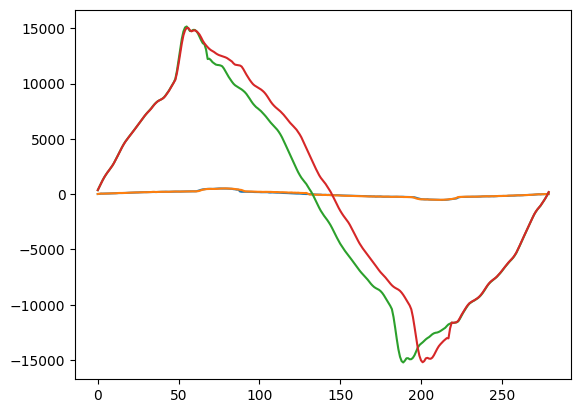

In [12]:
aaaaa = ['122.data',
'146.data',
'63.data',
'89.data',]

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import interpolate

for a in aaaaa:
    data = pd.read_csv('./电动车充电识别-数据/test/' + a, header=None)
    x = np.linspace(0, 1, len(data))
    y = data.to_numpy().flatten()
    f = interpolate.interp1d(x, y, kind="quadratic")
    xnew = np.linspace(0, 1, 280)
    ynew = f(xnew)
    print(len(ynew))
    data = ynew
    plt.plot(data)